In [1]:
from keras.datasets import mnist

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [5]:
train_images_1 = train_images[:1].reshape(28, 28)
train_labels_1 = train_labels[:1]
print(train_images_1.shape)
print(train_labels_1)

(28, 28)
[5]


In [6]:
import matplotlib.pyplot as plt

Text(0.5,1,'number 5')

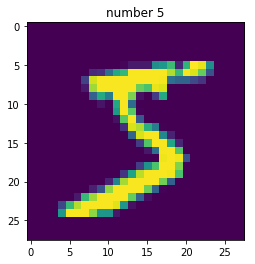

In [7]:
plt.imshow(train_images_1)
plt.title('number {}'.format(train_labels_1[0]))

In [8]:
from keras import models
from keras import layers

In [9]:
# 数据预处理
train_data = train_images.reshape((train_images.shape[0], train_images.shape[1]*train_images.shape[2]))
train_data.shape

(60000, 784)

In [10]:
train_data = train_data.astype('float32')/255

In [11]:
test_data = test_images.reshape((test_images.shape[0], test_images.shape[1]*test_images.shape[2]))
test_data = test_data.astype('float32')/255

In [12]:
test_data.shape

(10000, 784)

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
x_val = train_data[:10000]
x_train = train_data[10000:]
y_val = train_labels[:10000]
y_train = train_labels[10000:]

In [17]:
print(x_val.shape, x_train.shape)

(10000, 784) (50000, 784)


In [18]:
def shallow_network():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(28*28, )))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    return model

In [19]:
def deeper_network():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(28*28, )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    return model

In [20]:
shallow_model = shallow_network()
his_shallow = shallow_model.fit(x_train, y_train, epochs=5, batch_size=128,validation_data=(x_val, y_val))
his_shallow_dict = his_shallow.history
print(his_shallow_dict.keys())

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 4s 87us/step - loss: 0.5007 - acc: 0.8671 - val_loss: 0.2925 - val_acc: 0.9175
Epoch 2/5
50000/50000 [==============================] - 2s 41us/step - loss: 0.2631 - acc: 0.9252 - val_loss: 0.2376 - val_acc: 0.9331
Epoch 3/5
50000/50000 [==============================] - 2s 42us/step - loss: 0.2172 - acc: 0.9379 - val_loss: 0.2101 - val_acc: 0.9393
Epoch 4/5
50000/50000 [==============================] - 2s 42us/step - loss: 0.1890 - acc: 0.9457 - val_loss: 0.1957 - val_acc: 0.9459
Epoch 5/5
50000/50000 [==============================] - 2s 42us/step - loss: 0.1692 - acc: 0.9515 - val_loss: 0.1770 - val_acc: 0.9499
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [21]:
deeper_model = deeper_network()
his_deeper = deeper_model.fit(x_train, y_train, epochs=5, batch_size=128,validation_data=(x_val, y_val))
his_deeper_dict = his_deeper.history
print(his_deeper_dict.keys())

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 3s 52us/step - loss: 0.3956 - acc: 0.8905 - val_loss: 0.2127 - val_acc: 0.9410
Epoch 2/5
50000/50000 [==============================] - 2s 45us/step - loss: 0.1838 - acc: 0.9465 - val_loss: 0.1742 - val_acc: 0.9483
Epoch 3/5
50000/50000 [==============================] - 2s 45us/step - loss: 0.1367 - acc: 0.9599 - val_loss: 0.1380 - val_acc: 0.9585
Epoch 4/5
50000/50000 [==============================] - 2s 45us/step - loss: 0.1084 - acc: 0.9683 - val_loss: 0.1193 - val_acc: 0.9635
Epoch 5/5
50000/50000 [==============================] - 2s 45us/step - loss: 0.0913 - acc: 0.9729 - val_loss: 0.1067 - val_acc: 0.9687
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [22]:
test_shallow_loss, test_shallow_acc = shallow_model.evaluate(test_data, test_labels)
test_deeper_loss, test_deeper_acc = deeper_model.evaluate(test_data, test_labels)
print('shallow_acc ', test_shallow_acc)
print('deeper_acc ', test_deeper_acc)

10000/10000 [==============================] - 1s 63us/step
shallow_acc  0.9512
deeper_acc  0.9702


In [23]:
import matplotlib.pyplot as plt

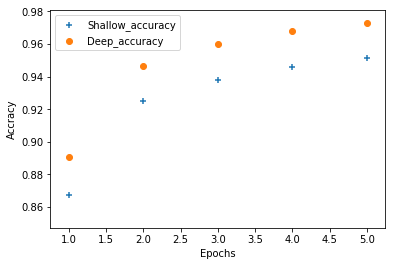

In [24]:
shallow_acc_value = his_shallow_dict['acc']
deeper_acc_value = his_deeper_dict['acc']
Epchos = range(1, len(deeper_acc_value) + 1)
plt.scatter(Epchos, shallow_acc_value, marker='+', label='Shallow_accuracy')
plt.scatter(Epchos, deeper_acc_value, marker='o', label='Deep_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accracy')
plt.legend()
plt.show()